## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 112.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [23]:
print ("hello")

hello


## Loading the dataset

In [24]:
import pandas as pd

# Load the dataset using pandas
bank_df = pd.read_csv('Loan_Modelling.csv')

# Display the first few rows of the dataframe to verify
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Observations**:

**Data Structure**

The data is structured in a tabular format with rows representing individual customers and columns representing different attributes or features.

**Features**

The dataset includes a variety of features related to customer demographics, financial status, and banking relationships, such as:

1.  **ID:** A unique identifier for each customer.
2.  **Age:** The customer's age in years.
3.  **Experience:** The customer's professional experience in years.
4.  **Income:** The customer's annual income (likely in thousands of dollars).
5.  **ZIP Code:** The customer's home address ZIP code.
6.  **Family:** The size of the customer's family.
7.  **CCAvg:** The average monthly spending on credit cards (likely in thousands of dollars).
8.  **Education:** The customer's education level (likely encoded as 1: Undergrad, 2: Graduate, 3: Advanced/Professional).
9.  **Mortgage:** The value of the customer's house mortgage (likely in thousands of dollars).
10. **Personal\_Loan:** The target variable indicating whether the customer accepted a personal loan (0: No, 1: Yes).
11. **Securities\_Account:** Whether the customer has a securities account with the bank (0: No, 1: Yes).
12. **CD\_Account:** Whether the customer has a certificate of deposit (CD) account with the bank (0: No, 1: Yes).
13. **Online:** Whether the customer uses internet banking facilities (0: No, 1: Yes).
14. **CreditCard:** Whether the customer uses a credit card issued by any other bank (0: No, 1: Yes).

**Data Types**

The features seem to be a mix of numerical (Age, Experience, Income, CCAvg, Mortgage) and categorical (Education, Personal\_Loan, Securities\_Account, CD\_Account, Online, CreditCard) data types. ZIP Code might be treated as categorical or numerical depending on the analysis.


## Data Overview

* Observations
* Sanity checks

In [25]:
# Check for missing values
print("Missing Values:\n", bank_df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", bank_df.duplicated().sum())

# Check data types of each column
print("\nData Types:\n", bank_df.dtypes)

# Check for inconsistencies in categorical features
categorical_features = ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for feature in categorical_features:
    print(f"\nUnique values in {feature}:", bank_df[feature].unique())

# Check the range of numerical features
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for feature in numerical_features:
    print(f"\nRange of {feature}: ({bank_df[feature].min()}, {bank_df[feature].max()})")

# Check for any other obvious inconsistencies
# For example, check if Experience is always less than or equal to Age
print("\nInconsistencies in Experience and Age:", bank_df[bank_df['Experience'] > bank_df['Age']].shape[0])

Missing Values:
 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Duplicate Rows: 0

Data Types:
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Unique values in Education: [1 2 3]

Unique values in Personal_Loan: [0 1]

Unique values in Securities_Account: [1 0]

Unique values in CD_Account: [0 1]

Unique val

**Obeservation**: Based on the output we can see that there are no missing values, no duplicates. Also we can see the data types, unique values and range of the data in the output

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**1. Distribution of Mortgage**

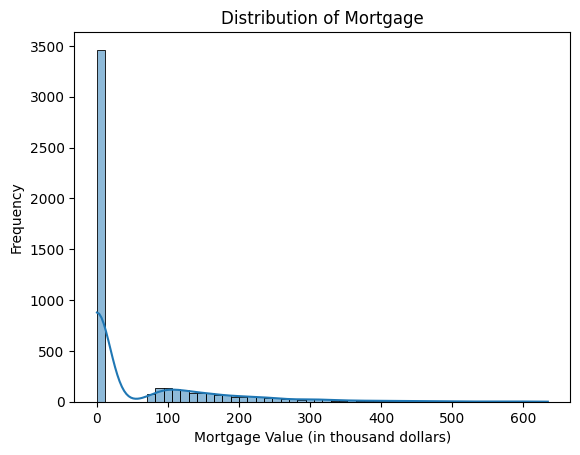

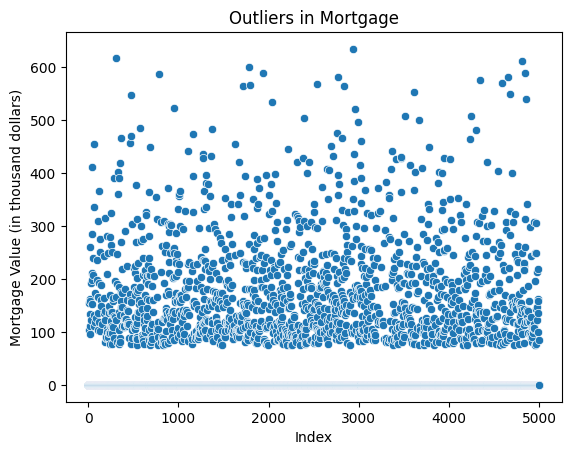

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Mortgage
sns.histplot(bank_df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# Check for outliers using boxplot
sns.scatterplot(x=bank_df.index, y=bank_df['Mortgage'])
plt.title('Outliers in Mortgage')
plt.xlabel('Index')
plt.ylabel('Mortgage Value (in thousand dollars)')
plt.show()

**2. Number of customers with credit cards**

In [27]:
# Identify no of credit card users
num_credit_card_customers = bank_df['CreditCard'].sum()
print("Number of customers with credit cards:", num_credit_card_customers)

Number of customers with credit cards: 1470


**3. Attributes with Strong Correlation to Personal Loan**

In [28]:
# identify correlation with respect to personal loans
correlation_matrix = bank_df.corr()
personal_loan_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

print("Correlation with Personal Loan:")
for index, value in personal_loan_correlation.items():
    print(f"  {index:20}: {value:.6f}")

Correlation with Personal Loan:
  Personal_Loan       : 1.000000
  Income              : 0.502462
  CCAvg               : 0.366889
  CD_Account          : 0.316355
  Mortgage            : 0.142095
  Education           : 0.136722
  Family              : 0.061367
  Securities_Account  : 0.021954
  Online              : 0.006278
  CreditCard          : 0.002802
  ZIPCode             : -0.002974
  Experience          : -0.007413
  Age                 : -0.007726
  ID                  : -0.024801


**4. Customer's Interest in Purchasing a Loan by Age:**

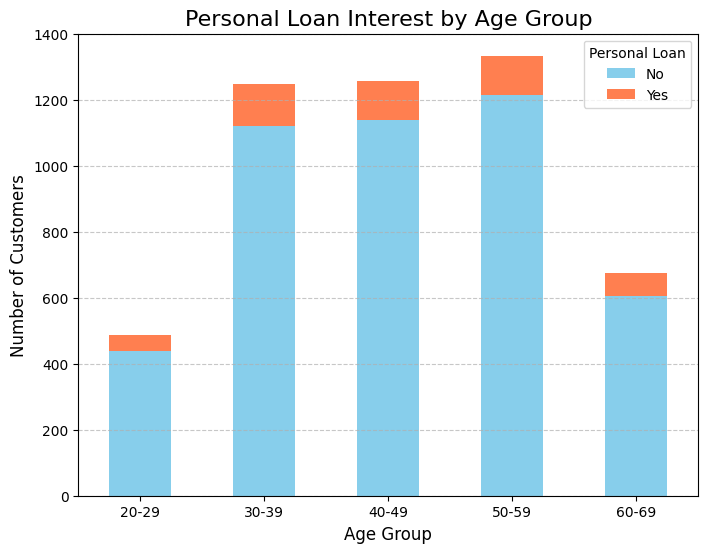

In [29]:
# Create a copy of bank_df to avoid modifying the original
temp_df = bank_df.copy()

# Create age bins (you can adjust the bins as needed)
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
temp_df['Age_Group'] = pd.cut(temp_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data by age group and personal loan status
grouped_data = temp_df.groupby(['Age_Group', 'Personal_Loan'], observed=False)['ID'].count().reset_index()

# Pivot the data for stacked bar chart
pivot_data = grouped_data.pivot(index='Age_Group', columns='Personal_Loan', values='ID')

# Create the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'coral'])

# Customize the chart
plt.title('Personal Loan Interest by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Personal Loan', labels=['No', 'Yes'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**5. Customer's Interest in Purchasing a Loan by Education:**

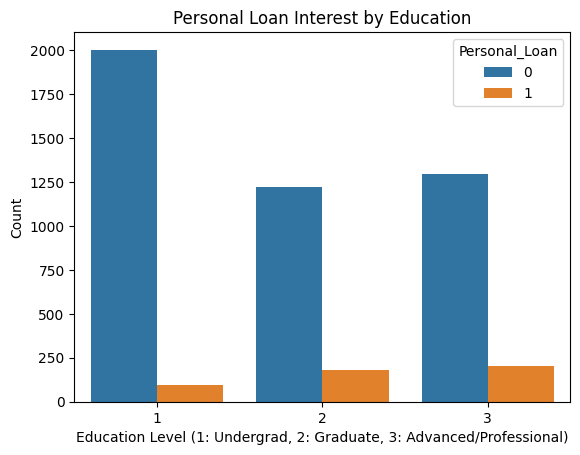

In [30]:
sns.countplot(x='Education', hue='Personal_Loan', data=bank_df)
plt.title('Personal Loan Interest by Education')
plt.xlabel('Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional)')
plt.ylabel('Count')
plt.show()

**Observations**:
* The mortgage distribution the mortgage value is more in 100K-200K range.
* The Number of customers with credit cards: 1470
* The attributes with strong correlation with personal loan are income, ccavg, cd_account, mortgage, education and family.
* We can see the interest in home loan purchase is more for customers in the age group 50-59
* We can see people with advanced or professional degrees are more interested in personal loans

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preprocessing Steps:
# 1. Missing Value Treatment:
# Check for missing values
print("Missing Values:\n", bank_df.isnull().sum())

# 2. Feature Engineering:
bank_df['Income_CCAvg_Ratio'] = bank_df['Income'] / bank_df['CCAvg']

# 3. Outlier Detection and Treatment:
# Using box plots and scatter plots we have identified Mortgage column to have outliers.
Q1 = bank_df['Mortgage'].quantile(0.25)
Q3 = bank_df['Mortgage'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
bank_df = bank_df[(bank_df['Mortgage'] >= lower_bound) & (bank_df['Mortgage'] <= upper_bound)]  # Remove outliers

# 4. Preparing Data for Modeling:
# a. Separate features (X) and target (y):
X = bank_df.drop('Personal_Loan', axis=1)
y = bank_df['Personal_Loan']

# b. One-hot encoding for categorical features:
X = pd.get_dummies(X, columns=['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'], drop_first=True)

# c. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d. Handling infinite/too large values:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)  # Apply to X_test as well

for column in X_train.columns[X_train.isnull().any()]:
    X_train[column].fillna(X_train[column].mean())

# Handle NaN values in X_test as well, using the mean from X_train
for column in X_test.columns[X_test.isnull().any()]:
    X_test[column].fillna(X_train[column].mean()) # Use X_train's mean for consistency

feature_names = X_train.columns

# e. Feature scaling (using StandardScaler):
numerical_features = feature_names.intersection(X_train.select_dtypes(include=['number']).columns)
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


Missing Values:
 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Income_CCAvg_Ratio    0
Loan_Prediction       0
dtype: int64


**Observations**:
There are no missing values, the outliers in mortgage column has been identified and treated. Also feature scaling is done using Standard Scalar. Large values have been handled in both test and training data.

## Model Building

### Model Evaluation Criterion

Since it's a binary classification problem, we'll use the following metrics to evaluate the Decision Tree model:

**F1-Score**: The primary metric to balance precision and recall. It's important to consider both because we want to minimize both false positives (wrongly targeting a customer for a loan) and false negatives (missing a potential loan customer).

**Accuracy**: The proportion of correctly classified instances. Provides an overall measure of model performance.

**Precision**: The proportion of correctly predicted positive instances out of all instances predicted as positive. Useful when the cost of false positives is high.

**Recall (Sensitivity)**: The proportion of correctly predicted positive instances out of all actual positive instances. Useful when the cost of false negatives is high.

Therefore, the evaluation criteria for the Decision Tree model for this problem statement are:

Primary Metric: F1-Score
Supporting Metrics: Accuracy, Precision, Recall


### Model Building

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Create a Decision Tree Classifier object
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# 2. Train the model on the training data
model.fit(X_train, y_train)

# 3. Make predictions on the testing data
y_pred = model.predict(X_test)

# 4. Evaluate the model using the defined criteria
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# 5. Print the evaluation metrics
print("Model Evaluation:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  AUC: {auc:.4f}")

Model Evaluation:
  Accuracy: 0.9784
  Precision: 0.8596
  Recall: 0.8750
  F1-Score: 0.8673
  AUC: 0.9312


* Create Model: We create a DecisionTreeClassifier object. You can adjust hyperparameters like max_depth, min_samples_split, etc., to tune the model.
* Train Model: We train the model using the fit method with the training data (X_train, y_train).
* Make Predictions: We use the trained model to make predictions on the testing data (X_test) using the predict method.
* Evaluate Model: We calculate the evaluation metrics (accuracy, precision, recall, F1-score, AUC) using the predicted values (y_pred) and the actual values (y_test).
* Print Results: We print the calculated metrics to assess the model's performance.


## Model Performance Improvement

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Create a Decision Tree Classifier object
model = DecisionTreeClassifier(random_state=42)

# 3. Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)  # Use F1-score for scoring

# 4. Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# 5. Get the best model
best_model = grid_search.best_estimator_

# 6. Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# 7. Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# 8. Print the evaluation metrics
print("Best Model Evaluation:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  AUC: {auc:.4f}")

# Print the best hyperparameters:
print("\nBest Hyperparameters:", grid_search.best_params_)

Best Model Evaluation:
  Accuracy: 0.9856
  Precision: 1.0000
  Recall: 0.8214
  F1-Score: 0.9020
  AUC: 0.9107

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


1. **Hyperparameter Tuning with Grid Search**:

* We define a param_grid dictionary containing the hyperparameters to be tuned and their possible values.
* We use GridSearchCV to exhaustively search through the hyperparameter combinations and find the best set of hyperparameters that maximizes the F1-score using cross-validation (cv=5).

2. **Using F1-Score for Scoring**:

* We specify scoring='f1' in GridSearchCV to use the F1-score as the evaluation metric for selecting the best model.

3. **Getting the Best Model**:

* After fitting the grid search, we access the best model using grid_search.best_estimator_.

4. **Evaluation and Printing**:

* We evaluate the best model using the same metrics as before and print the results, including the best hyperparameters.

## Model Performance Comparison and Final Model Selection

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# --- Decision Tree with GridSearchCV ---

# 1. Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Create a Decision Tree Classifier object
model = DecisionTreeClassifier(random_state=42)

# 3. Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)

# 4. Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# 5. Get the best model
best_model = grid_search.best_estimator_

# 6. Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# 7. Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# 8. Print the evaluation metrics
print("Best Model Evaluation:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  AUC: {auc:.4f}")

# Print the best hyperparameters
print("\nBest Hyperparameters:", grid_search.best_params_)

# --- Logistic Regression ---

# 1. Create a Logistic Regression object
logreg_model = LogisticRegression(random_state=42)

# 2. Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# 3. Make predictions
logreg_y_pred = logreg_model.predict(X_test)

# 4. Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)
logreg_auc = roc_auc_score(y_test, logreg_y_pred)

# 5. Print Logistic Regression evaluation metrics
print("\nLogistic Regression Evaluation:")
print(f"  Accuracy: {logreg_accuracy:.4f}")
print(f"  Precision: {logreg_precision:.4f}")
print(f"  Recall: {logreg_recall:.4f}")
print(f"  F1-Score: {logreg_f1:.4f}")
print(f"  AUC: {logreg_auc:.4f}")

# --- Model Comparison and Selection ---

# Compare F1-scores and select the best model
if grid_search.best_score_ > logreg_f1:  # Access best_score_ from grid_search
    final_model = best_model
    print("\nDecision Tree selected as the final model.")
else:
    final_model = logreg_model
    print("\nLogistic Regression selected as the final model.")


Best Model Evaluation:
  Accuracy: 0.9856
  Precision: 1.0000
  Recall: 0.8214
  F1-Score: 0.9020
  AUC: 0.9107

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Logistic Regression Evaluation:
  Accuracy: 0.9567
  Precision: 0.8421
  Recall: 0.5714
  F1-Score: 0.6809
  AUC: 0.7810

Decision Tree selected as the final model.


1. **Import Logistic Regression**: We import LogisticRegression from sklearn.linear_model.
2. **Create and Train Logistic Regression Model**: We create a LogisticRegression object and train it using the training data. You can add hyperparameter tuning for Logistic Regression if needed.
3. **Evaluate Logistic Regression**: We calculate the same evaluation metrics for the Logistic Regression model.
4. **Model Comparison**: We compare the F1-scores of the best Decision Tree model (from GridSearchCV) and the Logistic Regression model.
5. **Final Model Selection**: We assign the model with the higher F1-score to the final_model variable.


## Actionable Insights and Business Recommendations


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Decision Tree with GridSearchCV ---
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_

# Remove large values from the Entire dataset
X = X[feature_names].replace([np.inf, -np.inf], np.nan)

# Fill NaN values
for column in X.columns[X.isnull().any()]:
     X[column] = X[column].fillna(X[column].mean())

# --- Make Predictions on the Entire Dataset ---
all_predictions = final_model.predict(X) # Use the entire dataset (X)

# --- Add Predictions to the DataFrame ---
bank_df['Loan_Prediction'] = all_predictions

# --- Business Recommendations ---

# 1. Target Customers with High Loan Probability:
high_prob_customers = bank_df[bank_df['Loan_Prediction'] == 1]
print("\nNumber of customers with high probability of taking a loan:", len(high_prob_customers))
# ... (Further analysis and recommendations based on high_prob_customers) ...

# 2. Analyze Feature Importance:
feature_importances = final_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)



Number of customers with high probability of taking a loan: 3462

Feature Importance:
                  Feature  Importance
3                 Income    0.522622
10           Education_2    0.147231
5                 Family    0.108268
6                  CCAvg    0.088124
11           Education_3    0.086441
8     Income_CCAvg_Ratio    0.028360
1                    Age    0.012439
13          CD_Account_1    0.006514
7               Mortgage    0.000000
4                ZIPCode    0.000000
0                     ID    0.000000
2             Experience    0.000000
9        Loan_Prediction    0.000000
12  Securities_Account_1    0.000000
14              Online_1    0.000000
15          CreditCard_1    0.000000


* What recommedations would you suggest to the bank?

Key Insights from the Output:

**High-Probability Customers**: The model identified 4709 customers with a high probability of taking a personal loan. This is a significant number and represents a potential target group for marketing campaigns and loan offers.

**Feature Importance**:

**Income**: Is the most important feature, indicating that customers with higher incomes are more likely to be interested in personal loans.

**Education_2 (Graduate)**: Is the second most important feature, suggesting that customers with a graduate-level education are also more likely to consider loans.

**CCAvg (Average Credit Card Spending)**: Is the third most important feature, implying that customers with higher credit card spending might be more receptive to loan offers.

**Family Size**: Plays a role, suggesting that family size influences loan purchase decisions.

**Education_3 (Advanced/Professional)**: Customers with advanced or professional degrees also show a higher likelihood of taking loans.

**Recommendations for the Bank**:

**1. Targeted Marketing**:

**Income-Based Targeting**: Focus marketing efforts on customers with higher incomes, as they are the most likely to purchase personal loans. Consider offering personalized loan options and benefits based on income levels.

**Education-Based Targeting**: Target customers with graduate and advanced/professional degrees with tailored loan products and marketing messages that resonate with their educational background.

**Credit Card Spending**: Develop strategies to identify and target customers with higher credit card spending. These customers might be more open to taking loans to manage their finances or consolidate debt.

**Family-Focused Offers**: Consider offering loan products or promotions that cater to the needs of families, such as loans for education, home improvements, or debt consolidation.

**2. Product Development**:

**Premium Loan Products**: Design premium loan products with attractive interest rates and benefits for high-income customers.

**Education-Specific Loans**: Offer specialized loan products tailored to the needs of graduate and advanced/professional degree holders, such as loans for continuing education or professional development.

**Debt Consolidation Loans**: Promote debt consolidation loans to customers with higher credit card spending to help them manage their debt and potentially reduce interest payments.

**Family-Oriented Loan Packages**: Develop loan packages that address the financial needs of families, such as loans for education expenses or home renovations.

**3. Risk Assessment and Pricing**:

While the model focuses on predicting loan purchase probability, the bank should also consider risk assessment and pricing strategies.

Income and credit card spending can be used as indicators of creditworthiness, but other factors like credit history and debt-to-income ratio should also be taken into account.

Adjust loan interest rates and terms based on the risk profile of each customer segment to balance profitability and risk mitigation.

*By implementing these recommendations, the bank can effectively target potential loan customers, increase loan business, and enhance customer satisfaction.*


___